<a href="https://colab.research.google.com/github/joshIsac/computervisionlab/blob/main/2346523_cv_lab6__Non_Linear_Spatial_Filtering_using_Built_in_and_user_defined_functions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd

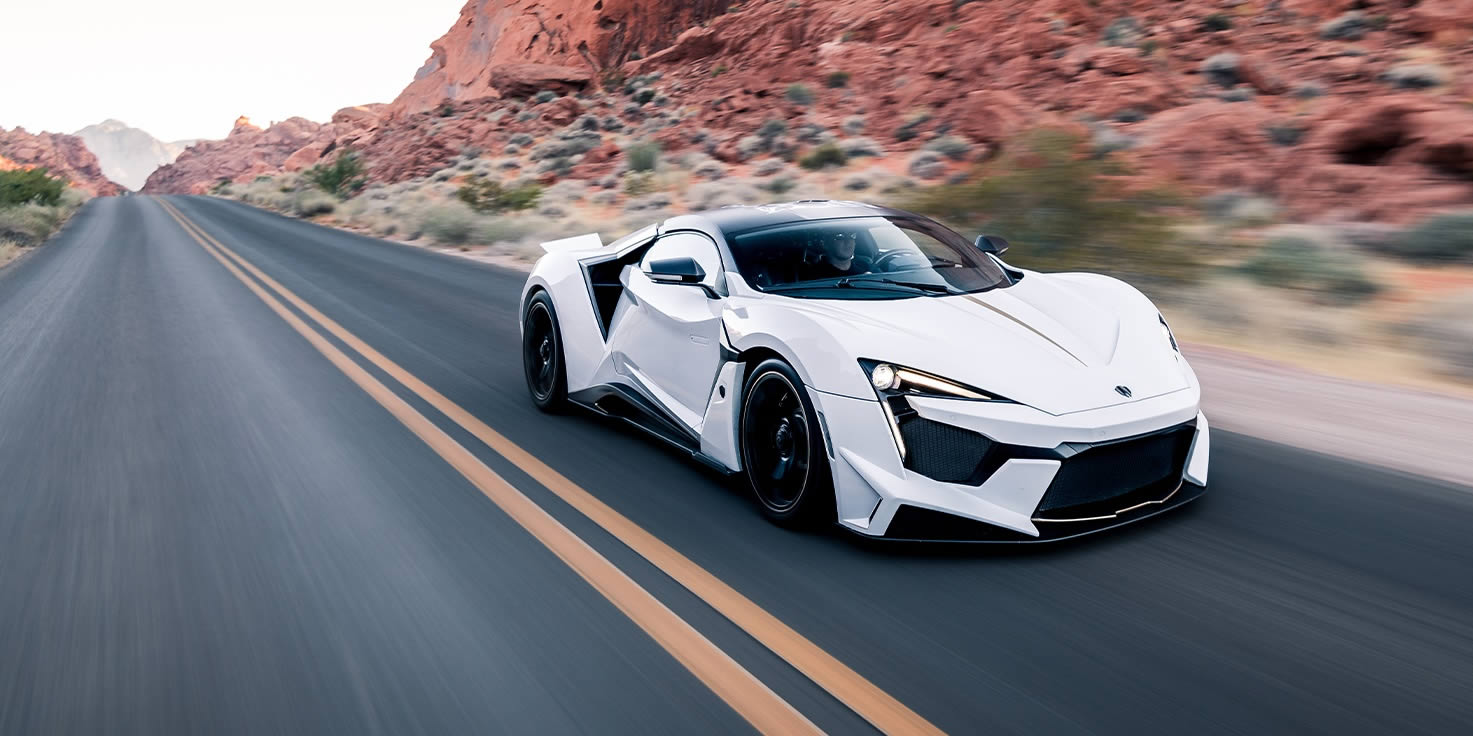

In [53]:
img_path='/content/drive/MyDrive/wmotors_fenyrsupersport_gallery_img_01.jpg'
img=cv2.imread(img_path)
cv2_imshow(img)

In [54]:
print(img)

[[[249 251 252]
  [249 251 252]
  [249 251 252]
  ...
  [115 122 185]
  [114 121 184]
  [110 119 183]]

 [[249 251 252]
  [249 251 252]
  [249 251 252]
  ...
  [112 119 182]
  [110 117 180]
  [106 114 181]]

 [[249 251 252]
  [249 251 252]
  [249 251 252]
  ...
  [109 115 180]
  [107 113 178]
  [103 111 178]]

 ...

 [[ 94  82  70]
  [ 93  81  69]
  [ 92  80  68]
  ...
  [ 68  56  46]
  [ 68  56  46]
  [ 69  57  47]]

 [[ 94  82  70]
  [ 93  81  69]
  [ 92  80  68]
  ...
  [ 68  56  46]
  [ 68  56  46]
  [ 69  57  47]]

 [[ 94  82  70]
  [ 93  81  69]
  [ 92  80  68]
  ...
  [ 68  56  46]
  [ 68  56  46]
  [ 69  57  47]]]


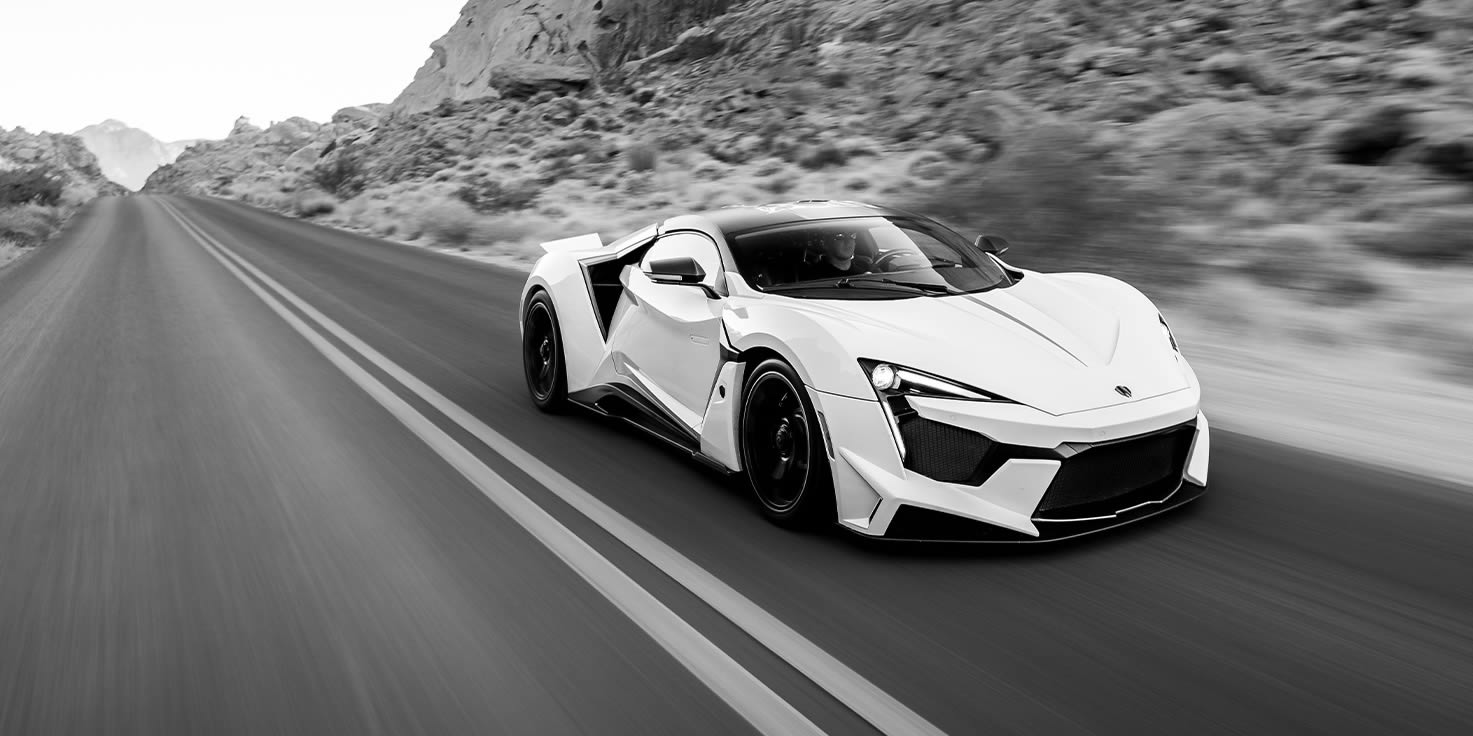

In [55]:
#convert the image to grayscale
img_gray=cv2.imread(img_path,0)
cv2_imshow(img_gray)

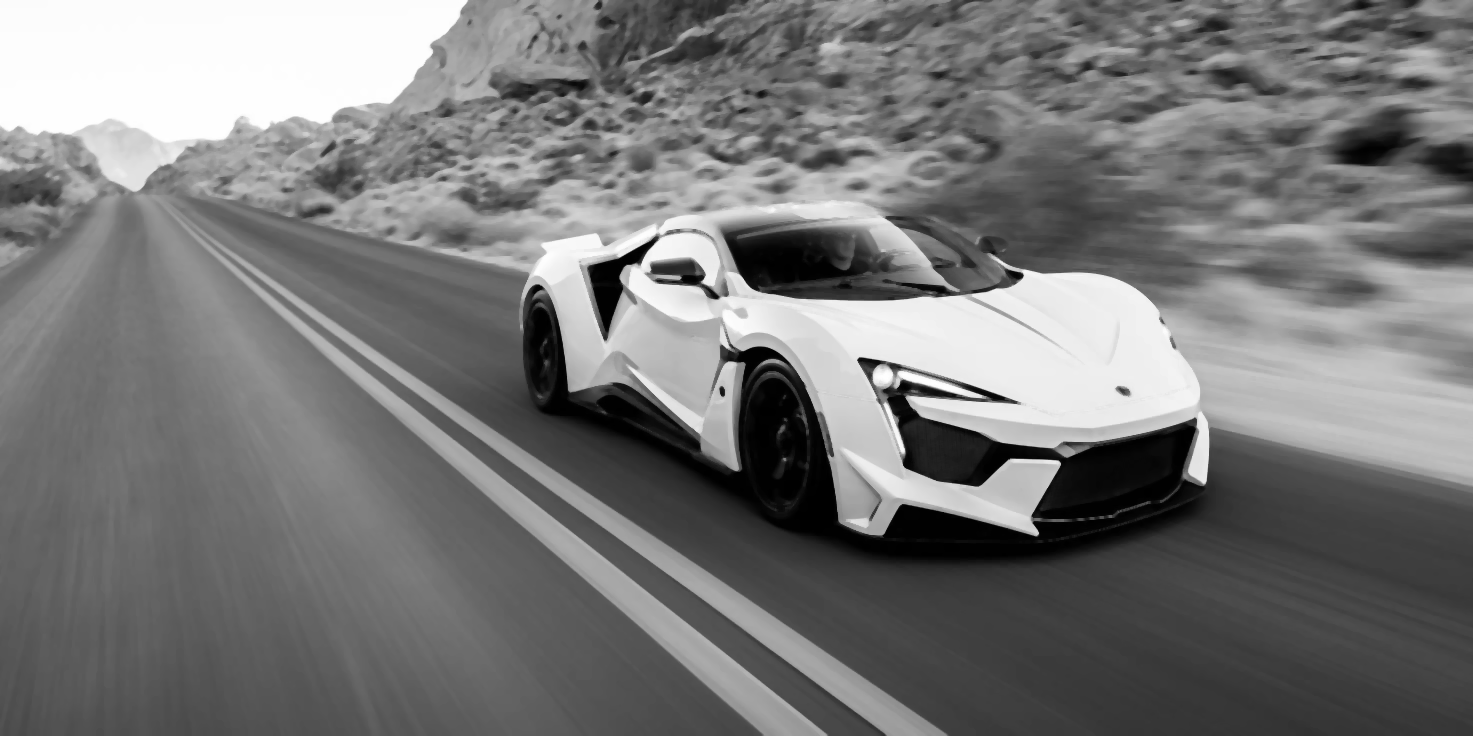

In [56]:
#median filter built in
from scipy.ndimage import median_filter, maximum_filter, minimum_filter
median_filtered_img = cv2.medianBlur(img_gray,5)
cv2_imshow(median_filtered_img)

In [57]:
#user defined
def median_filter(image, kernel_size):
    result = np.zeros_like(img_gray)
    padding = kernel_size // 2
    padded_image = cv2.copyMakeBorder(img_gray, padding, padding, padding, padding, cv2.BORDER_CONSTANT)
    for i in range(padding, img_gray.shape[0] + padding):
        for j in range(padding, img_gray.shape[1] + padding):
            neighbors = padded_image[i - padding : i + padding + 1, j - padding : j + padding + 1].ravel()
            result[i - padding, j - padding] = np.median(neighbors)
    return result

# Apply user-defined median filter
median_filter = median_filter(img_gray, 5)


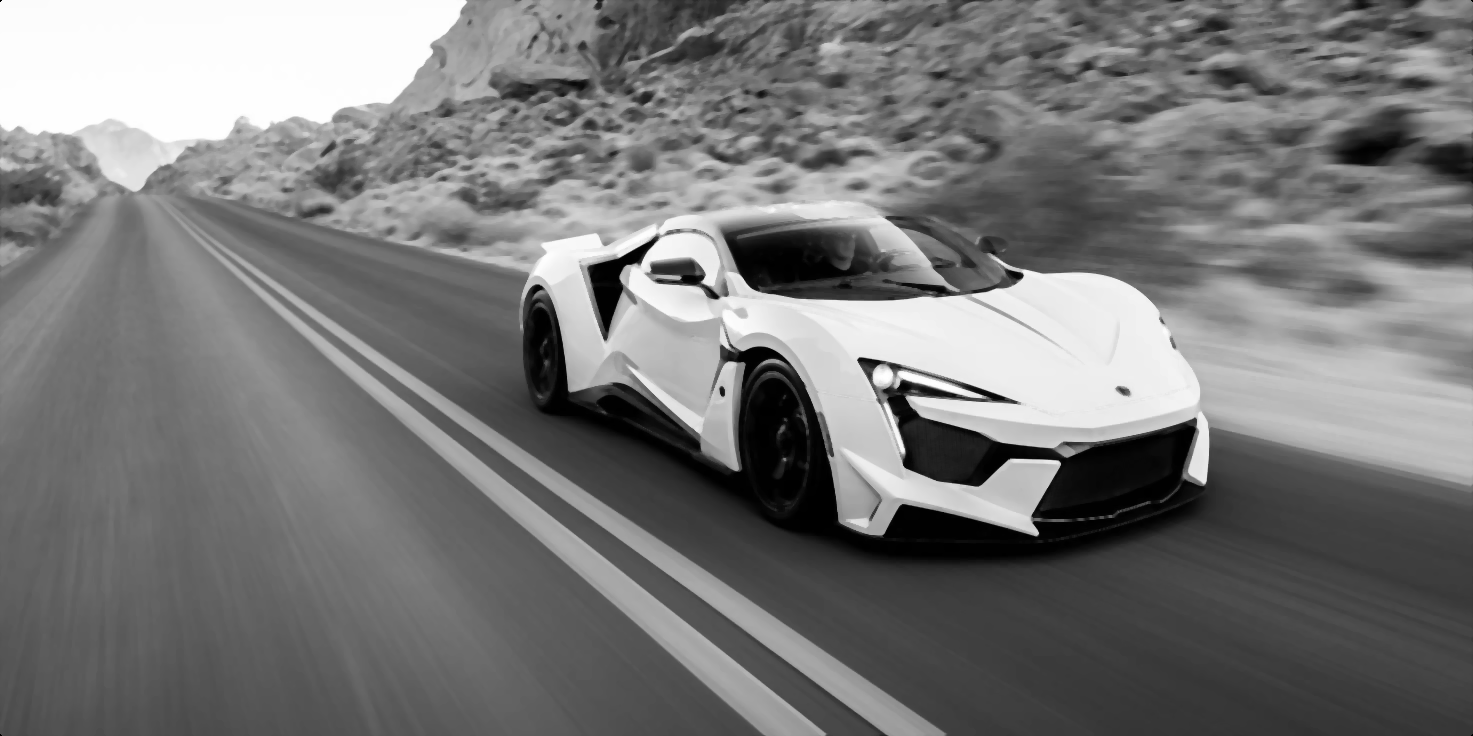

In [58]:
cv2_imshow(median_filter)

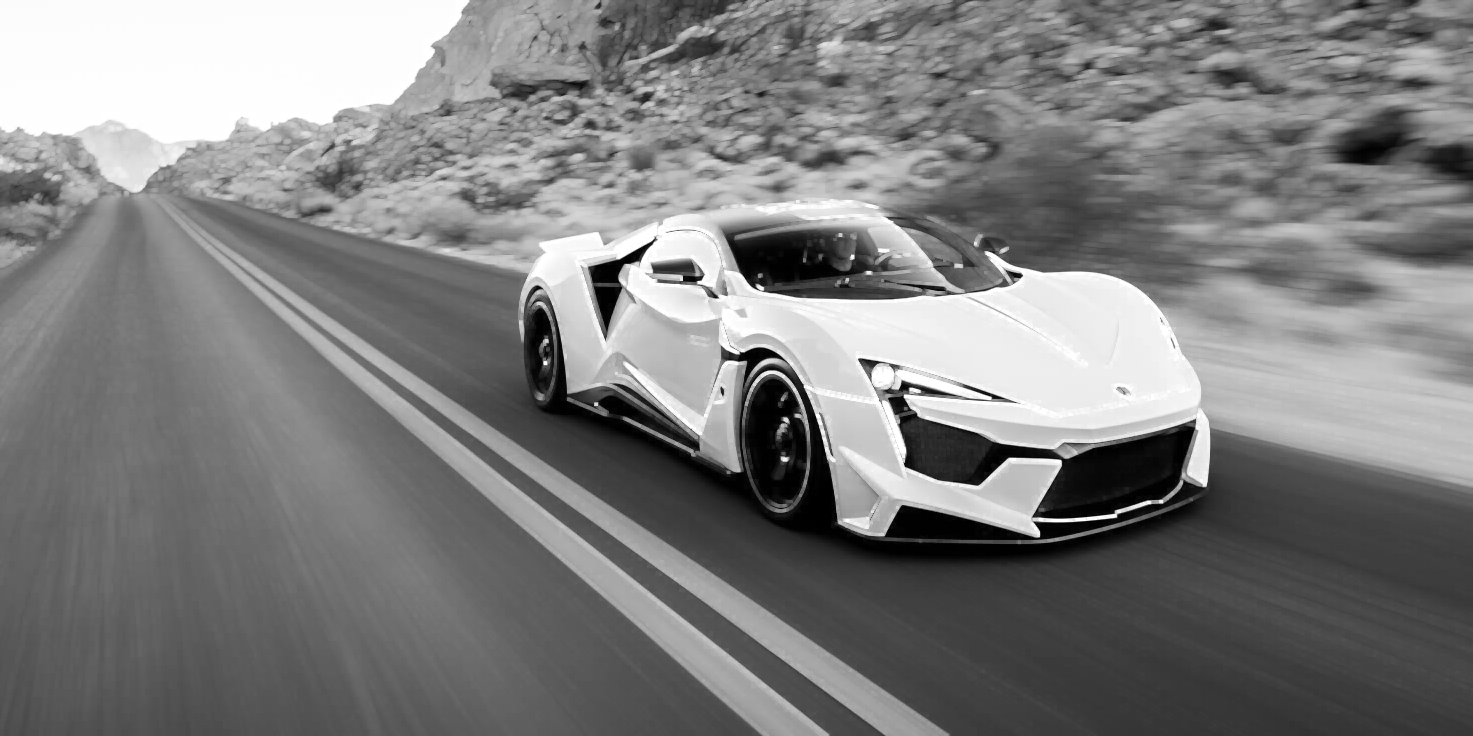

In [59]:
#max Filter(built in)
max_filter_built_in = maximum_filter(img_gray, size=3)
cv2_imshow(max_filter_built_in)


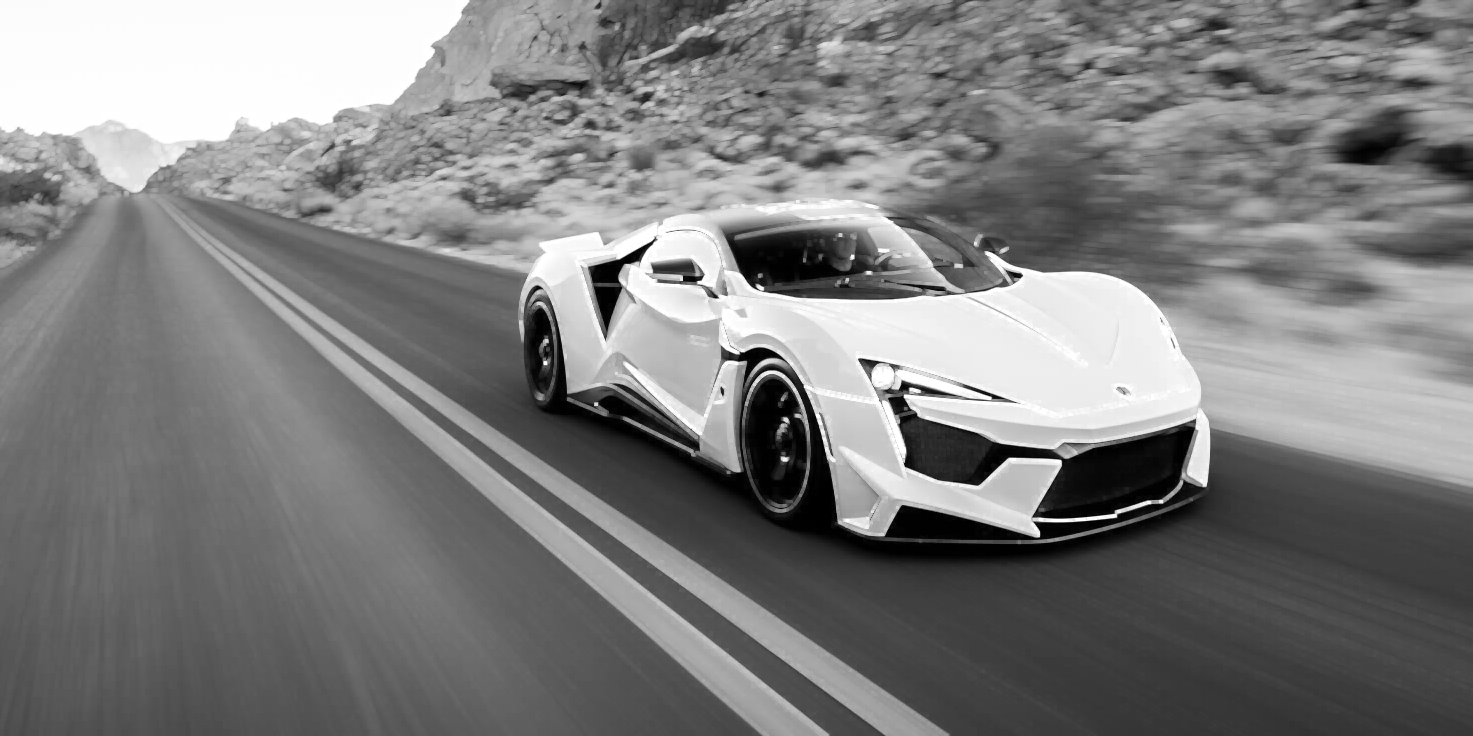

In [60]:
#max filter user defined
def max_filter_custom(image, kernel_size):
    result = np.zeros_like(img_gray)
    padded_image = np.pad(img_gray, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.max(neighbors)
    return result
max_filtered_image_custom = max_filter_custom(img_gray, kernel_size=3)
cv2_imshow(max_filtered_image_custom)

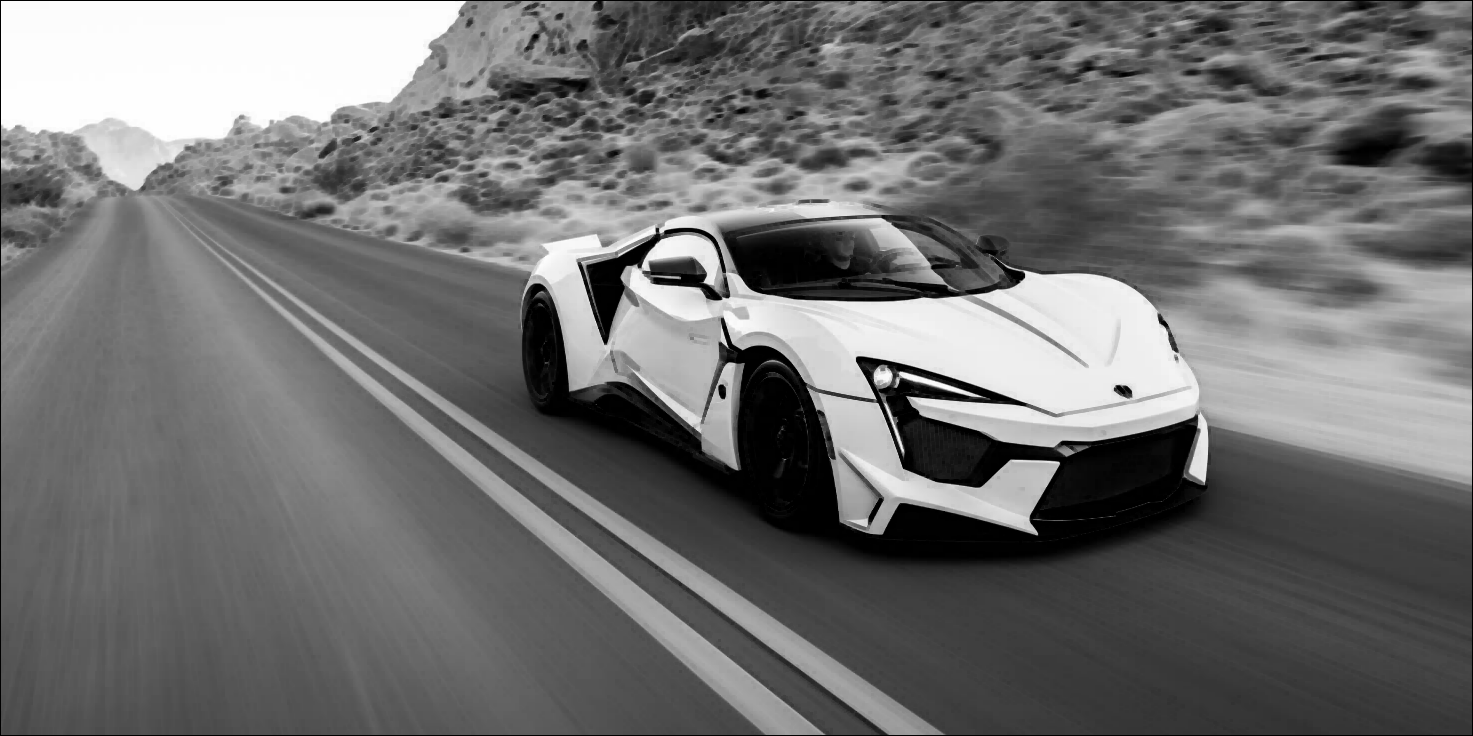

In [61]:
def min_filter_custom(image, kernel_size):
    result = np.zeros_like(img_gray)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.min(neighbors)
    return result
min_filtered_image_custom = min_filter_custom(img_gray, kernel_size=3)
cv2_imshow(min_filtered_image_custom)


In [ ]:
#built in function min filter
min_filter = minimum_filter(img_gray, size=3)
cv2_imshow(min_filter)

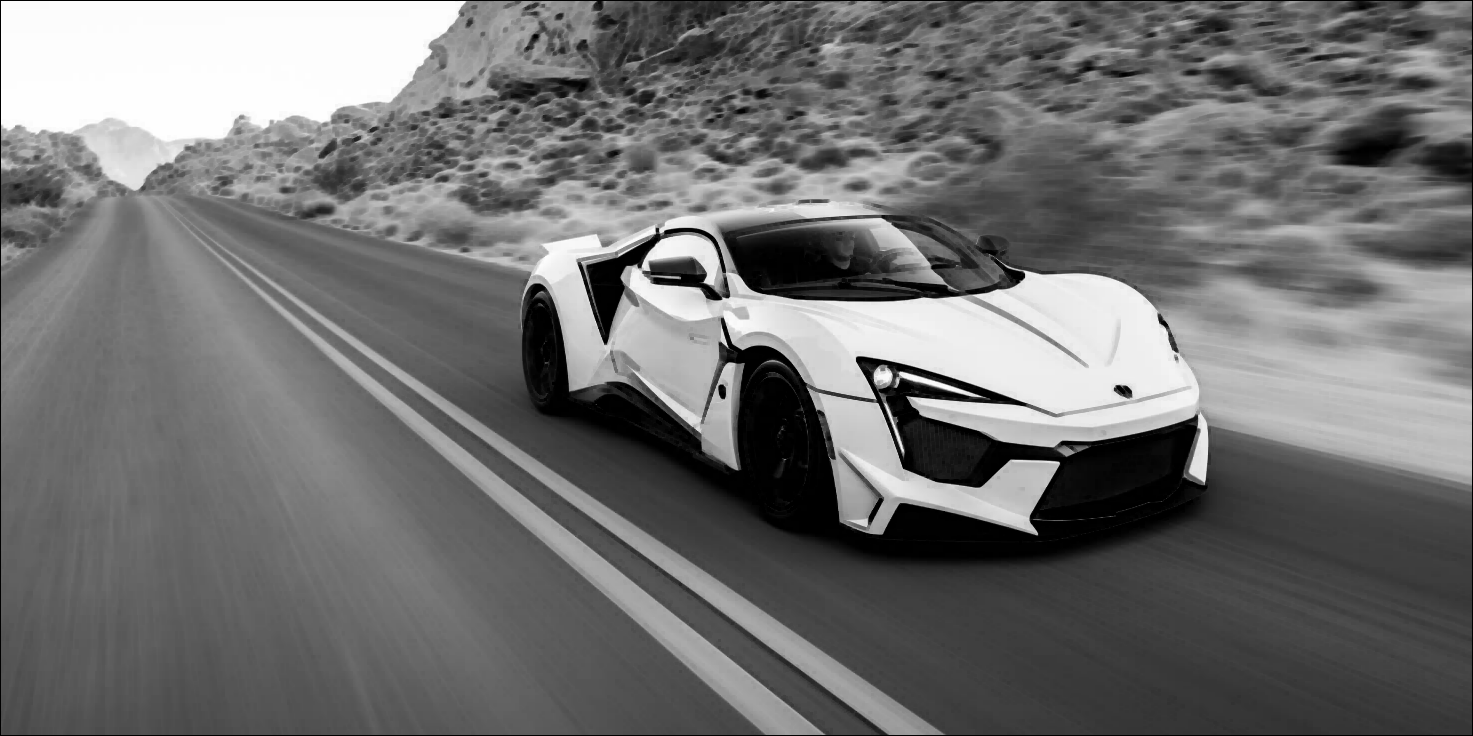

In [62]:
def min_filter_custom(image, kernel_size):
    result = np.zeros_like(img_gray)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.min(neighbors)
    return result
min_filtered_image_custom = min_filter_custom(img_gray, kernel_size=3)
cv2_imshow(min_filtered_image_custom)

In [ ]:
#midpoint filter (built in)
def midpoint_filter(image, kernel_size):
    max_filtered = maximum_filter(img_gray, kernel_size)
    min_filtered = minimum_filter(img_gray, kernel_size)
    result = (max_filtered + min_filtered) / 2
    return result
midpoint_filter_built_in = midpoint_filter(img_gray, kernel_size=3)
cv2_imshow(midpoint_filter_built_in)


In [ ]:
from scipy.ndimage import generic_filter

def alpha_trimmed_filter(image, kernel_size, alpha):
    def alpha_trimmed_mean(data):
        sorted_data = np.sort(data)
        trimmed_data = sorted_data[alpha:-alpha]
        return np.mean(trimmed_data)
    result = generic_filter(image, alpha_trimmed_mean, size=kernel_size)
    return result
alpha_trimmed_filter_built_in = alpha_trimmed_filter(img_gray, kernel_size=3, alpha=1)
cv2_imshow(alpha_trimmed_filter_built_in)

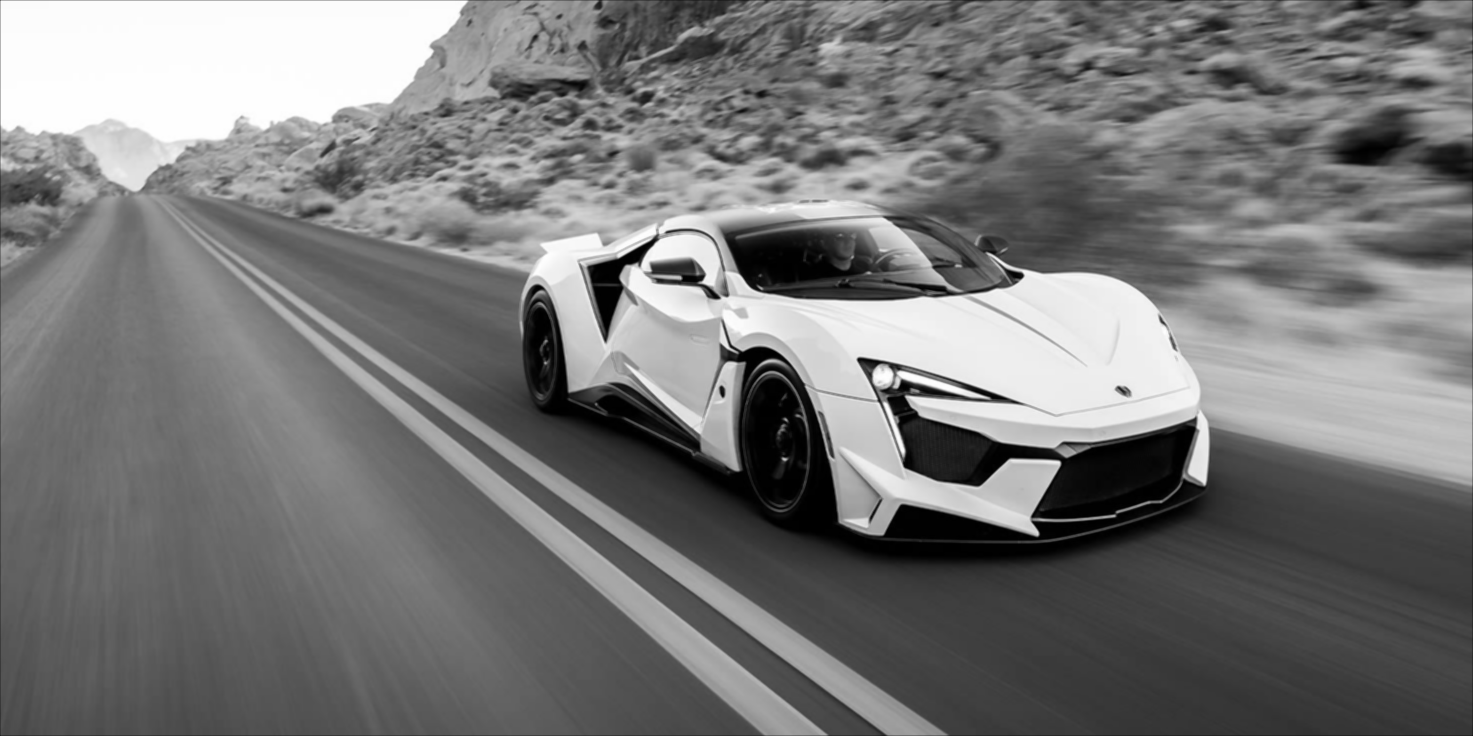

In [64]:
#Alpha Trimmed Filter (User defined)


def alpha_trimmed_filter(image, kernel_size, alpha):
    result = np.zeros_like(img)
    padded_image = np.pad(img_gray, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            neighbors = np.sort(neighbors)
            trimmed_neighbors = neighbors[alpha:-alpha]
            result[i, j] = np.mean(trimmed_neighbors)
    return result
alpha_trimmed_filtered_image_custom = alpha_trimmed_filter(img_gray, kernel_size=3, alpha=1)
cv2_imshow(alpha_trimmed_filtered_image_custom)

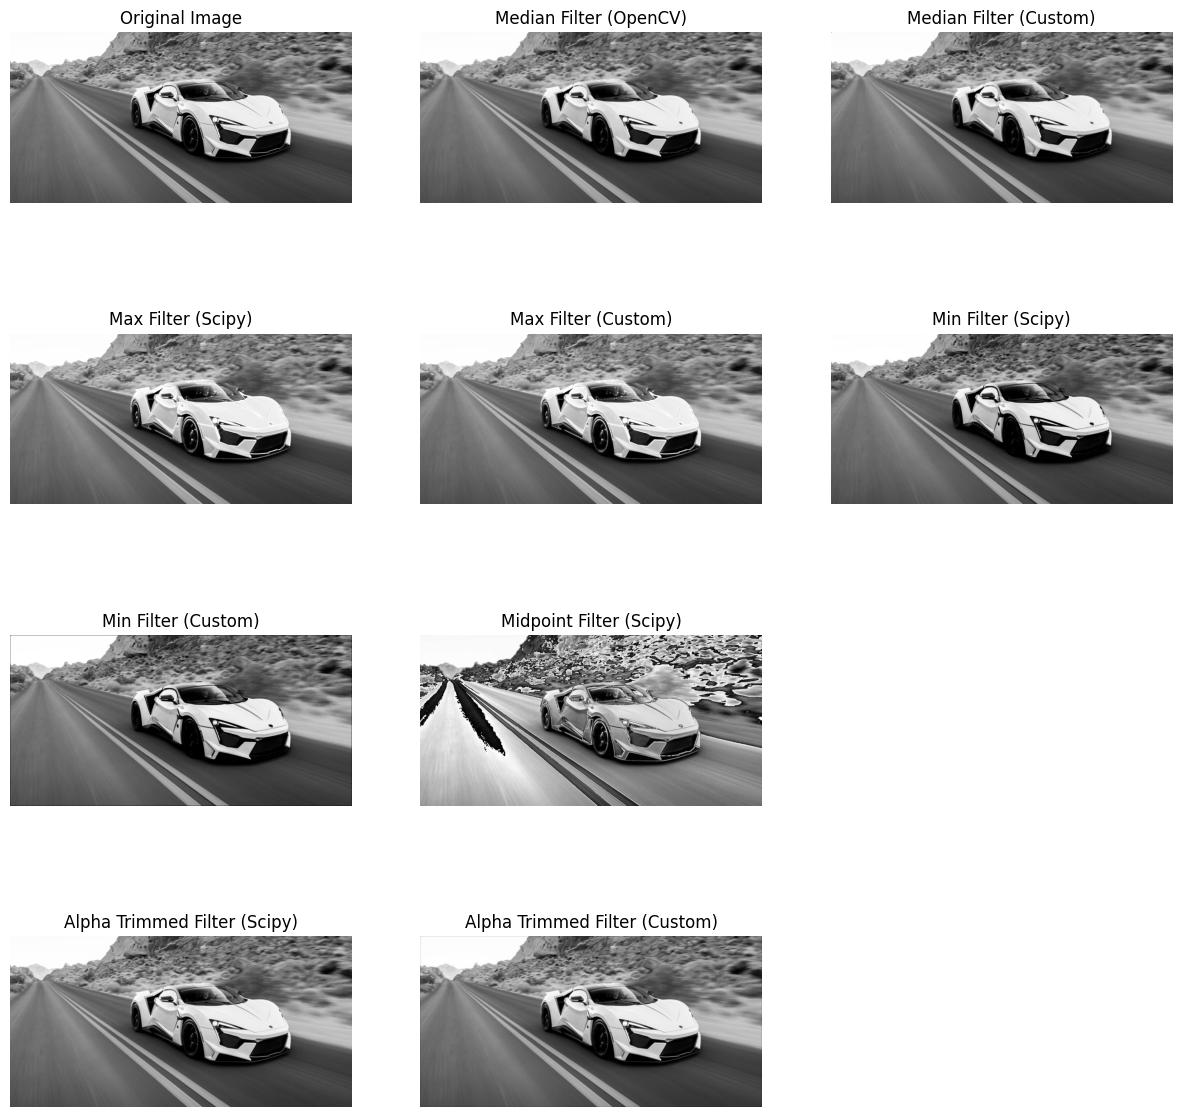

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.subplot(431), plt.imshow(img_gray, cmap='gray'), plt.title('Original Image'),plt.axis('off')
plt.subplot(432), plt.imshow(median_filtered_img , cmap='gray'), plt.title('Median Filter (OpenCV)'),plt.axis('off')
plt.subplot(433), plt.imshow(median_filter, cmap='gray'), plt.title('Median Filter (Custom)'),plt.axis('off')
plt.subplot(434), plt.imshow(max_filter_built_in, cmap='gray'), plt.title('Max Filter (Scipy)'),plt.axis('off')
plt.subplot(435), plt.imshow(max_filtered_image_custom, cmap='gray'), plt.title('Max Filter (Custom)'),plt.axis('off')
plt.subplot(436), plt.imshow(min_filter, cmap='gray'), plt.title('Min Filter (Scipy)'),plt.axis('off')
plt.subplot(437), plt.imshow(min_filtered_image_custom, cmap='gray'), plt.title('Min Filter (Custom)'),plt.axis('off')
plt.subplot(438), plt.imshow(midpoint_filter_built_in, cmap='gray'), plt.title('Midpoint Filter (Scipy)'),plt.axis('off')
plt.subplot(4,3,10), plt.imshow(alpha_trimmed_filter_built_in, cmap='gray'), plt.title('Alpha Trimmed Filter (Scipy)'),plt.axis('off')
plt.subplot(4,3,11), plt.imshow(alpha_trimmed_filtered_image_custom, cmap='gray'), plt.title('Alpha Trimmed Filter (Custom)'),plt.axis('off')
plt.show()